## **상관분석**

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
iris = datasets.load_iris()

In [3]:
np.corrcoef(iris['data'][:,2], iris['data'][:,3])

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_df = pd.DataFrame(iris['data'], columns = iris.feature_names)

In [15]:
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [22]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


(4, 0)

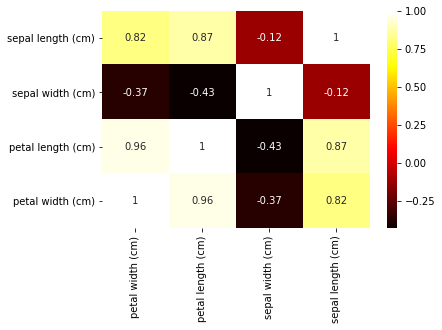

In [27]:
sns.heatmap(iris_df.corr(), annot = True, cmap = 'hot')
plt.ylim([4,0])
plt.xlim([4,0])

## **가설 검정**

In [28]:
from scipy import stats
import pandas as pd
import numpy as np

## **단일집단 t검정**  
  
: 단일집단의 평균이 어떤 특정한 집단의 평균과 차이가 있는지를 검정하는 방법  
  
환경 :  국내 생산 노트북 평균 사용시간이 5.2시간으로 파악된 상황. A회사 노트북 평균 사용시간과 차이가 있는지 검정하기 위해 150대를 랜덤 선정하여 검정 실시.  
  
- 귀무가설 : 평균 시간의 차이가 없다
- 대립가설 : 평균 시간의 차이가 있다

절차 : 샤피로 테스트의 검정결과 유의수준 > 0.05이면 정규분포로 판단하고 t-test를 수행한다.  
  
그렇지 않은 경우, 윌콕스 테스트를 진행함.

#### **샤피로테스트의 귀무가설 : 해당 표본은 정규분포와 차이가 없다**

In [29]:
np.random.seed(100)
one_sample = np.round(np.random.normal(5.1, 1, 150), 1)

In [30]:
one_sample

array([3.4, 5.4, 6.3, 4.8, 6.1, 5.6, 5.3, 4. , 4.9, 5.4, 4.6, 5.5, 4.5,
       5.9, 5.8, 5. , 4.6, 6.1, 4.7, 4. , 6.7, 6.6, 4.8, 4.3, 5.3, 6. ,
       5.8, 6.5, 4.8, 5.2, 5.3, 3.7, 4.3, 5.9, 5.9, 4.6, 6.3, 3.4, 3.7,
       3.9, 4.6, 4.4, 5.1, 4.5, 6.4, 3.4, 4.1, 5.5, 3.5, 6.6, 3.9, 4.6,
       4.2, 4.3, 5.2, 5.6, 4.2, 6.3, 5. , 4.2, 4.2, 5.1, 5.3, 5.1, 3.5,
       4.1, 5.7, 5.8, 6.1, 3.7, 3.3, 5.5, 4.8, 4.4, 7.1, 4.5, 5.9, 3.8,
       5.7, 4. , 5.8, 5.8, 3.5, 6. , 5.9, 5.5, 5.2, 5.1, 4.5, 3.9, 3.4,
       5.5, 7. , 4.7, 6.9, 5.1, 5. , 5.1, 4.9, 2.6, 3.4, 4. , 2.1, 5.1,
       4.9, 4.6, 5.2, 5.1, 5.4, 4.3, 3.8, 5.2, 4.7, 3.9, 4.7, 3.8, 6.7,
       5.8, 3.1, 5. , 3.6, 7.1, 3.7, 4. , 4.9, 3.7, 6. , 5.1, 6. , 5.9,
       3.6, 3.9, 6.4, 6.1, 3.9, 4.9, 3.6, 5.2, 5.8, 5.5, 3.7, 4.5, 5.9,
       4.7, 7.2, 4.8, 4.5, 5.9, 5.3, 4.8])

In [33]:
static, p = stats.shapiro(one_sample)

In [34]:
static

0.9897478818893433

In [35]:
p

0.34463170170783997

#### p-value는 0.344로 0.05보다 매우 커 귀무가설을 기각할 수 없다. 따라서 정규분포를 따르므로 t-test 수행

In [36]:
stats.ttest_1samp(one_sample, 5.2)

Ttest_1sampResult(statistic=-3.214946711763571, pvalue=0.0015999004385247693)

#### t-test 실시 결과 p-value는 0.001 < 0.05이므로 귀무가설을 기각하고 대립가설을 채택한다.  
#### 따라서 A회사 노트북과 국내 생산 노트북의 평균 시간은 차이가 있다.

## **두 집단 평균 차이 검정**  
  
levene()를 이용해 두 집단의 분포가 동질한지 검정하고 동질하다면 equal_var = True로  
동질하지 않으면 equal_var = False로 진행한다.  
  
- 귀무가설 : 두 집단의 분포는 차이가 없다 (동질하다)

A 공정을 통한 재료의 강도와 B 공정을 통한 재료의 강도를 각각 50개의 표본으로 조사하였다. 두 집단의 강도에 차이가 있는가?  
  
- 귀무가설 : 두 집단의 평균은 차이가 없다.

In [37]:
np.random.seed(50)
a = np.random.choice(range(100,131),50)
b = np.random.choice(range(90,140),50)

In [38]:
stats.levene(a,b)

LeveneResult(statistic=10.455556028067193, pvalue=0.0016668365977815334)

#### p-value = 0.0016 < 0.05이므로 두 집단의 분포는 동질하지 않다 --> equal_var = False

In [43]:
stats.ttest_ind(a, b, equal_var = False)

Ttest_indResult(statistic=-0.37348367924784004, pvalue=0.7097345147148231)

#### p-value = 0.790 > 0.05이므로 귀무가설을 채택한다. 따라서 두 집단의 평균 차이는 없다.

## **카이제곱검정**

In [44]:
ad = pd.read_csv('C:/Users/admin/Desktop/210614~/210614/데이터/ad.csv')

In [45]:
ad.head(4)

,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다


In [57]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
광고    1000 non-null object
구입    1000 non-null object
dtypes: object(2)
memory usage: 15.8+ KB


In [46]:
ad_cross = pd.crosstab(ad['광고'], ad['구입'])

In [58]:
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [59]:
chi2_static = 81/360 + 81/40 + 81/540 + 81/60

In [61]:
chi2_static

3.75

In [70]:
chi2, p, dof, ef = stats.chi2_contingency(ad_cross, correction = False)

In [71]:
# 카이제곱통계량
chi2

3.75

In [72]:
# p-value
p

0.052807511416113395

In [73]:
# 자유도
dof

1

In [74]:
# 기대빈도
ef

array([[360.,  40.],
       [540.,  60.]])

#### **그래프**

In [75]:
xs = np.linspace(0, 10, 50)

In [76]:
# 자유도가 1인 카이제곱분포를 따르는 확률변수 생성
rv = stats.chi2(1)

In [77]:
# 유의수준 0.05일때 카이제곱통계량
rv.isf(0.05)

3.8414588206941285

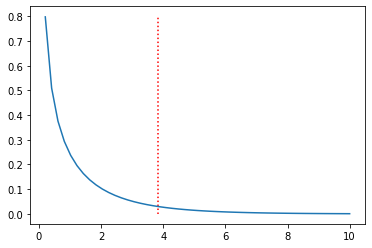

In [82]:
plt.plot(xs, rv.pdf(xs))
plt.vlines(rv.isf(0.05), ymin = 0, ymax = 0.8, color = 'r', ls = ':')

In [85]:
?plt.vlines

Signature:
plt.vlines(
    x,
    ymin,
    ymax,
    colors='k',
    linestyles='solid',
    label='',
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot vertical lines.

Plot vertical lines at each *x* from *ymin* to *ymax*.

Parameters
----------
x : scalar or 1D array_like
    x-indexes where to plot the lines.

ymin, ymax : scalar or 1D array_like
    Respective beginning and end of each line. If scalars are
    provided, all lines will have same length.

colors : array_like of colors, optional, default: 'k'

linestyles : {'solid', 'dashed', 'dashdot', 'dotted'}, optional

label : string, optional, default: ''

Returns
-------
lines : `~matplotlib.collections.LineCollection`

Other Parameters
----------------
**kwargs : `~matplotlib.collections.LineCollection` properties.

See also
--------
hlines : horizontal lines
axvline: vertical line across the axes

Notes
-----


.. note::
    In addition to the above described arguments, this function can take a
    **data** keyword argu

#### **[주사위 게임]**  
  
나를 골탕먹이는 친구 A가 가져온 주사위로 몰래 혼자 게임을 실시해보았다. 나는 이 주사위로 A와 내기를 해야할까?

In [86]:
freq = [16, 7, 7, 15, 11, 4]

In [87]:
stats.chisquare(freq)

Power_divergenceResult(statistic=11.6, pvalue=0.040699388504049985)

In [88]:
# 카이제곱통계량 구하기
np.sum((np.array(freq) - 10)**2/10)

11.6

p-value는 0.04 < 0.05이므로 관측빈도와 기대빈도는 차이가 없다는 귀무가설이 의심된다.  
A가 주사위를 조작하지는 않았을까?

In [91]:
xs = np.linspace(0,30,100)

In [105]:
# 자유도가 5인 카이제곱분포를 따르는 확률변수 생성
rv = stats.chi2(5)

In [106]:
# 유의수준 0.05일때 카이제곱통계량
rv.isf(0.05)

11.070497693516355

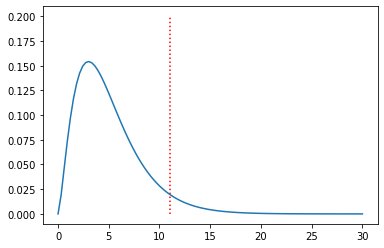

In [107]:
plt.plot(xs, rv.pdf(xs))
plt.vlines(rv.isf(0.05), ymin = 0, ymax = 0.2, color = 'r', ls = ':')